## Defining questions

### a) Specifying the question

- Football matches have three possible outcomes. A win, draw, or lose. The outcome depends on a number of factors such a the whether the team is away or at home. Some matches are played in neutral grounds e.g. worlcup matches, friendlies hence no team technically is away or at home.

- Mchezo ltd wants a model that can predicte an outcome of a football match between two national football teams(home win, draw, or home lose)

- Furthermore MChezo ltd wants a model that can predict the home team score and away team score

### b) Defining the Metric of Success

- The project shall be classified a success if 

1. Result model - a model is developed with an accuracy of over 75% for the outcome of a match result. This high accuracy is due to the greater simplcity of predicting a match outcome due to a limited number of possibilities

2. Correct score home/away model - a model is developed with an accuracy of 55% that can correctly predict the score of a home team and an away team in a football match. The low accuracy is set due difficulty and high number of possible outcome in a football match

### c) Understanding the context

Mchezopesa Ltd is a analytical football company. They deal with predicting of outcomes of football matches

A footall match is a contest between two opposing sides with 11 players each playing on a football pitch. The winner of the contest is determined by who has scored the most goals. Different factors contribute to the outcome of a football match and the number of goals scored by a football team. 

These factors are items such as the quality of players a team has in its disposal, historical results betweeb the two opposing sides( you might find a team with a higher quality team having a team with a lower quality as its achilles heel), and the location the match is played(normally due to home support a team that plays a match in its backyard tends to have that advantage).

A ranking system was introduced by fifa that ranks team  on their quality.
A points system is used, with points being awarded based on the results of all FIFA-recognised full international matches. The ranking system has been revamped on several occasions, generally responding to criticism that the preceding calculation method did not effectively reflect the relative strengths of the national teams. Since 16 August 2018, the current version of the ranking system has adopted the Elo rating system used in chess and Go.

Items such as fifa rankings, historical performances of the team, venue a match is played shall help in the determination of the correct score of an away or home team and the match result. FIFA rankings are updated every couple of months

### d) Recording the experimental design

To achieve the set objectives the documentation belpw details the steps that shall be followed

1. Importing necesssary libraries
2. Loading the two datasets and previewing them
3. Validating the two datasets externally from verified sources
4. Merging the two datasets
5. Tidyinng the datasets for outliers, duplicates, null values,creating new columns, and renaming columns appropiately
6. Performing univariate and bivariate analysis on the merged dataset and checking for multicolinearity
7. Encoding categorical variables
8. Creating a model to predict home team goals. steps(scaling data, univariate selection, linear regression analysis and polynomial regression, heteroskedasticity test, cross validation and lastly  challenging solution)
9. Creating a model to predict away team goals. steps(scaling data, univariate selection, linear regression analysis and polynomial regression, heteroskedasticity test, cross validation and lastly challenging solution)
10. 9. Creating a model to predict match outcome. steps(scaling data, univariate selection, logistic regression analysis and challenging solution)
11. Follow up questions


### e) Data relevance 

The various attributes in the datasets have been explained below:
1. Rank - countries rank as per FIFA's ranking metric
2. Country Abbreviation - abbreviation of  a countries name
3. Total Points - total points awarded to a country as per fifa metric 
4. Previous Points- previous points a team had prior to FIFA points revaluation
5. Rank Change- change in a teams ranking
6. Average Previous Years Points - average points for by a team for the previous year
7. Average Previous Years Points Weighted (50%)- average points for by a team for the previous year weighted
8. Average 2 Years Ago Points- average points for by a team for the previous two years
9. Average 2 Years Ago Points Weighted (30%)- average points for by a team for the previous two years weighted
10. Average 3 Years Ago Points- average points for by a team for the previous three years
11. Average 3 Years Ago Points Weighted (20%) - average points for by a team for the previous three years weighted
12. Confederation- the football continental organization a team belongs
13. Date - date of the match
14. Home_team - the name of the home team
15. Away_team - the name of the away team
16. Home_score - full-time home team score including extra time, not including penalty-shootouts
17. Away_score - full-time away team score including extra time, not including penalty-shootouts
18. Tournament - the name of the tournament
19. City - the name of the city/town/administrative unit where the match was played
20. Country - the name of the country where the match was played
21. Neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

## Importing libraries

In [102]:
# Importing pandas
import pandas as pd

# Importing numpy
import numpy as np

# Importing matplotlib
import matplotlib.pyplot as plt

# Importing seaborn
import seaborn as sns

# Importing datetime
import datetime

# Importing scipy.stats
import scipy.stats as stats

# Importing scipy
import scipy as sp

# Importing polynomialfeatures from sklearn preprocessing
from sklearn.preprocessing import PolynomialFeatures

# Importing train_test_split from sklearn linear model
from sklearn.model_selection import train_test_split

# Importing LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

# Importing LogisticRegressionmethod from sklearn linear_model library
from sklearn.linear_model import LogisticRegression

# Importing metrics from sklearn model selection
from sklearn import metrics

# Importing labelencoder as sklearn preprocessing
from sklearn.preprocessing import LabelEncoder

# Importing KFold from sklearn model selection
from sklearn.model_selection import KFold

# Importing Preprocessing from sklearn
from sklearn import preprocessing

# Importing leaveoneout from sklearn model selection
from sklearn.model_selection import LeaveOneOut

# Importing confusion_matrix from sklearn metrics
from sklearn.metrics import confusion_matrix

# importing accuracy_score from sklearn metrics
from sklearn.metrics import accuracy_score

# importing linear_model, datasets from sklearn metrics
from sklearn import linear_model, datasets

# Importing SelectKbest from sklearn feature selection
from sklearn.feature_selection import SelectKBest

# Importing chi2 from sklearn feature selection
from sklearn.feature_selection import chi2

# importing GridSearchCV from sklearn model selection
from sklearn.model_selection import GridSearchCV

# importing cross_val_predict form sklearn.model_selection
from sklearn.model_selection import cross_val_predict

# importing mean_squared_error, r2_score form sklearn Metrics
from sklearn.metrics import mean_squared_error, r2_score

# Importing KFold from sklearn model selection
from sklearn.model_selection import KFold

# Home team score as the dependent feature
from sklearn.feature_selection import f_classif

# Importing classification_report from sklearn metrics
from sklearn.metrics import classification_report

# Importing warnings
import warnings
warnings.filterwarnings('ignore')

## Loading data

In [103]:
# Loading fifa rankings dataset
rankings = pd.read_csv('/content/fifa_ranking.csv')

In [104]:
# Loading results dataset
results = pd.read_csv('/content/results.csv')

## Checking data

In [105]:
# Previewing first 5 records of fifa rankings dataset
rankings.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
0,1,Germany,GER,0.000,57,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,UEFA,1993-08-08
1,2,Italy,ITA,0.000,57,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,UEFA,1993-08-08
2,3,Switzerland,SUI,0.000,50,9,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,UEFA,1993-08-08
3,4,Sweden,SWE,0.000,55,0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,UEFA,1993-08-08
4,5,Argentina,ARG,0.000,51,5,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONMEBOL,1993-08-08


In [106]:
# Previewing last 5 records of fifa rankings dataset
rankings.tail()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57788,206,Anguilla,AIA,0.000,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONCACAF,2018-06-07
57789,206,Bahamas,BAH,0.000,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CONCACAF,2018-06-07
57790,206,Eritrea,ERI,0.000,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CAF,2018-06-07
57791,206,Somalia,SOM,0.000,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,CAF,2018-06-07
57792,206,Tonga,TGA,0.000,0,1,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,OFC,2018-06-07


In [107]:
# Previewing first 5 records of results dataset
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [108]:
# Previewing last 5 records of results dataset
results.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
40834,2019-07-18,American Samoa,Tahiti,8,1,Pacific Games,Apia,Samoa,True
40835,2019-07-18,Fiji,Solomon Islands,4,4,Pacific Games,Apia,Samoa,True
40836,2019-07-19,Senegal,Algeria,0,1,African Cup of Nations,Cairo,Egypt,True
40837,2019-07-19,Tajikistan,North Korea,0,1,Intercontinental Cup,Ahmedabad,India,True
40838,2019-07-20,Papua New Guinea,Fiji,1,1,Pacific Games,Apia,Samoa,True


In [109]:
# Preview column info for fifa rankings dataset
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   rank                     57793 non-null  int64  
 1   country_full             57793 non-null  object 
 2   country_abrv             57793 non-null  object 
 3   total_points             57793 non-null  float64
 4   previous_points          57793 non-null  int64  
 5   rank_change              57793 non-null  int64  
 6   cur_year_avg             57793 non-null  float64
 7   cur_year_avg_weighted    57793 non-null  float64
 8   last_year_avg            57793 non-null  float64
 9   last_year_avg_weighted   57793 non-null  float64
 10  two_year_ago_avg         57793 non-null  float64
 11  two_year_ago_weighted    57793 non-null  float64
 12  three_year_ago_avg       57793 non-null  float64
 13  three_year_ago_weighted  57793 non-null  float64
 14  confederation         

**Observations**
- The fifa rankings dataset has 16 columns and 57793 records

- rank_date column has inappropiate datatype

In [110]:
# previewing column info for results dataset
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        40839 non-null  object
 1   home_team   40839 non-null  object
 2   away_team   40839 non-null  object
 3   home_score  40839 non-null  int64 
 4   away_score  40839 non-null  int64 
 5   tournament  40839 non-null  object
 6   city        40839 non-null  object
 7   country     40839 non-null  object
 8   neutral     40839 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


**Observations**
- The dataset containing results has 9 columns and a total of 40839 records

- date time column has inappropiate datatype

In [111]:
# Shape of rankings and results dataframe
print (f'''
The rankings dataset has the shape: {rankings.shape}, 
while the dataset containing the results has the shape: 
{results.shape} rows and columns respectively
  ''')


The rankings dataset has the shape: (57793, 16), 
while the dataset containing the results has the shape: 
(40839, 9) rows and columns respectively
  


## External data source validation

### a. Validation ranking dataframe

The rankings dataset will be verified using the fifa mens rankings data obtained from the fifa website for the year 2018 on the month of june. 

- The records(current points, country name, position, and previous points)  for the first five countries on 7th of june 2018 shall be from our dataframe will be compared to those obtained from the fifa website (link below).

link: https://www.fifa.com/fifa-world-ranking/men?dateId=id12210

- The records for the first Five countries on 7th june 2018 as obtained from the website are as follows:

1. First country: Position- 1, Country- Germany, Current points- 1558, Previous points- 1544	

2. Second country: Position- 2,Country- Brazil,Current points- 1431, Previous points- 1384	

3. Third country: Position- 3, Country- Belgium, Current points- 1298, Previous points- 1346

4. Fourth country: Position- 4, Country- Portugal, Current points- 1274,  Previous points- 1306

5. Fifth country: Position- 5, Country- Argentina, Current points- 1241,  Previous points- 1254


In [112]:
# Selecting the fifa ranking records for 2018-06-07
rankings_2018 = rankings[(rankings['rank_date'] == '2018-06-07')] 

# First five ranked countries
rankings_2018.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date
57582,1,Germany,GER,1558.490,1544,0,775.060,775.060,832.000,416.000,424.260,127.280,1200.770,240.150,UEFA,2018-06-07
57583,2,Brazil,BRA,1430.570,1384,0,558.950,558.950,1082.360,541.180,560.210,168.060,811.880,162.380,CONMEBOL,2018-06-07
57584,3,Belgium,BEL,1298.320,1346,0,629.980,629.980,645.630,322.820,529.800,158.940,932.920,186.580,UEFA,2018-06-07
57585,4,Portugal,POR,1273.690,1306,0,646.920,646.920,691.820,345.910,517.770,155.330,627.630,125.530,UEFA,2018-06-07
57586,5,Argentina,ARG,1241.450,1254,0,404.070,404.070,809.590,404.800,829.980,248.990,917.940,183.590,CONMEBOL,2018-06-07


**Result**
- Comparing the first five countries by fifa ranking on 7th of June, 2018, it is clear that they are similar.
- Hence it can be concluded the data is accurate

### b. Validation of results dataframe

The dataset containing results will be validated using the data from the official worldcup website. The lin is attached below.
- link: https://www.google.com/search?q=2014+world+cup&oq=2014+wor&aqs=chrome.0.0i512j46i512j69i57j0i512j46i512j0i512l2j69i60.4636j0j7&sourceid=chrome&ie=UTF-8#sie=lg;/m/030791;2;/m/030q7;mt;fp;1;;

- The first match worldcup 2014 was held on 12th June 2014. A comparison of teams and scores for home/first team and away/second team will be compared to validate the dataset

Results:
- Match 1: Brazil Vs Croatia, Score: 3-1
- Match 2: Mexico Vs Cameron, Score: 1-0
- Match 3: Spain Vs Netherlands, Score: 1-5
- Match 4: Chile Vs Austrilia, Score: 3-1
- Match 5: Colombia Vs Greece, Score: 3-0

The results data will be filtered for results from 12th-14th June 2014

In [113]:
# Dates
dates = ['2014-06-12', '2014-06-13', '2014-06-14']

# Selecting the fifa ranking records for 2018-06-07
results_2014 = results[results['date'].isin(dates)]

# First five ranked countries
results_2014.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
36066,2014-06-12,Brazil,Croatia,3,1,FIFA World Cup,São Paulo,Brazil,False
36067,2014-06-13,Chile,Australia,3,1,FIFA World Cup,Cuiabá,Brazil,True
36068,2014-06-13,Mexico,Cameroon,1,0,FIFA World Cup,Natal,Brazil,True
36069,2014-06-13,Spain,Netherlands,1,5,FIFA World Cup,Salvador,Brazil,True
36070,2014-06-14,Colombia,Greece,3,0,FIFA World Cup,Belo Horizonte,Brazil,True


**Result**
- The results for the first five matches from the official worldcup site for 2014 world are similar to that of the the dataset
- The dataset is accurate

## Merging datasets

In [114]:
# convert the 'Date' column to datetime format in rankings
rankings['rank_date']= pd.to_datetime(rankings['rank_date'])
 
# Check the format of 'Date' column
rankings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57793 entries, 0 to 57792
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   rank                     57793 non-null  int64         
 1   country_full             57793 non-null  object        
 2   country_abrv             57793 non-null  object        
 3   total_points             57793 non-null  float64       
 4   previous_points          57793 non-null  int64         
 5   rank_change              57793 non-null  int64         
 6   cur_year_avg             57793 non-null  float64       
 7   cur_year_avg_weighted    57793 non-null  float64       
 8   last_year_avg            57793 non-null  float64       
 9   last_year_avg_weighted   57793 non-null  float64       
 10  two_year_ago_avg         57793 non-null  float64       
 11  two_year_ago_weighted    57793 non-null  float64       
 12  three_year_ago_avg       57793 n

In [115]:
# convert the 'Date' column to datetime format in results
results['date']= pd.to_datetime(results['date'])
 
# Check the format of 'Date' column
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40839 entries, 0 to 40838
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        40839 non-null  datetime64[ns]
 1   home_team   40839 non-null  object        
 2   away_team   40839 non-null  object        
 3   home_score  40839 non-null  int64         
 4   away_score  40839 non-null  int64         
 5   tournament  40839 non-null  object        
 6   city        40839 non-null  object        
 7   country     40839 non-null  object        
 8   neutral     40839 non-null  bool          
dtypes: bool(1), datetime64[ns](1), int64(2), object(5)
memory usage: 2.5+ MB


In [116]:
# Renaming rank_date in rankings
rankings = rankings.rename(columns={"rank_date": "date"})

In [117]:
# Merging results and rankings on month and year and country
# away team data
away_team = results[['away_team', 'date' ]]

# Home team data
home_team = results[['home_team', 'date']]

# Renaming rank_date in rankings
rankings_home = rankings.rename(columns={"country_full": "home_team", "rank": "rank_home", "total_points":"total_points_home", 'previous_points':'previous_points_home', 'rank_change':'rank_change_home', 'cur_year_avg':'cur_year_avg_home',
       'cur_year_avg_weighted': 'cur_year_avg_weighted_home', 'last_year_avg':'last_year_avg_home', 'last_year_avg_weighted':'last_year_avg_weighted_home',
       'two_year_ago_avg': 'two_year_ago_avg_home', 'two_year_ago_weighted': 'two_year_ago_weighted_home', 'three_year_ago_avg':'three_year_ago_avg_home',
       'three_year_ago_weighted':'three_year_ago_weighted_home'})

In [118]:
# Joining home_team to rankings
home_merged = pd.merge(home_team, rankings_home, on=['date', 'home_team'], how='inner')

# Drop and maintain only necessary columns
home_merged = home_merged[['home_team', 'rank_home',
       'total_points_home', 'previous_points_home', 'rank_change_home',
       'cur_year_avg_home', 'cur_year_avg_weighted_home', 'last_year_avg_home',
       'last_year_avg_weighted_home', 'two_year_ago_avg_home',
       'two_year_ago_weighted_home', 'three_year_ago_avg_home',
       'three_year_ago_weighted_home', 'confederation', 'date']]

In [119]:
# Renaming rankings appropiately for our merge
rankings_away = rankings.rename(columns={"country_full": "away_team", "rank": "rank_away", "total_points":"total_points_away", 'previous_points':'previous_points_away', 'rank_change':'rank_change_away', 'cur_year_avg':'cur_year_avg_away',
       'cur_year_avg_weighted': 'cur_year_avg_weighted_away', 'last_year_avg':'last_year_avg_away', 'last_year_avg_weighted':'last_year_avg_weighted_away',
       'two_year_ago_avg': 'two_year_ago_avg_away', 'two_year_ago_weighted': 'two_year_ago_weighted_away', 'three_year_ago_avg':'three_year_ago_avg_away',
       'three_year_ago_weighted':'three_year_ago_weighted_away'})

In [120]:
# Joining home_team to rankings
away_merged = pd.merge(away_team, rankings_away, on=['date', 'away_team'], how='inner')

# Drop and maintain only necessary columns
away_merged = away_merged[['away_team', 'rank_away',
       'total_points_away', 'previous_points_away', 'rank_change_away',
       'cur_year_avg_away', 'cur_year_avg_weighted_away', 'last_year_avg_away',
       'last_year_avg_weighted_away', 'two_year_ago_avg_away',
       'two_year_ago_weighted_away', 'three_year_ago_avg_away',
       'three_year_ago_weighted_away', 'date']]

In [121]:
# Merging results dataset with home_team dataset with rank and points
results1 = pd.merge(away_merged, results, on=['date', 'away_team'], how='inner')

# Merging results dataset with away_team dataset with rank and points
results1 = pd.merge(home_merged, results1, on=['date', 'home_team'], how='inner')

In [122]:
results1.columns

Index(['home_team', 'rank_home', 'total_points_home', 'previous_points_home',
       'rank_change_home', 'cur_year_avg_home', 'cur_year_avg_weighted_home',
       'last_year_avg_home', 'last_year_avg_weighted_home',
       'two_year_ago_avg_home', 'two_year_ago_weighted_home',
       'three_year_ago_avg_home', 'three_year_ago_weighted_home',
       'confederation', 'date', 'away_team', 'rank_away', 'total_points_away',
       'previous_points_away', 'rank_change_away', 'cur_year_avg_away',
       'cur_year_avg_weighted_away', 'last_year_avg_away',
       'last_year_avg_weighted_away', 'two_year_ago_avg_away',
       'two_year_ago_weighted_away', 'three_year_ago_avg_away',
       'three_year_ago_weighted_away', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [123]:
# Dropping unwanted columns
results_df = results1.drop(columns = ['home_team', 'away_team', 'city', 'country', 'date', 'tournament', 'confederation'])

# Preview
results_df.head()

,rank_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,...,cur_year_avg_weighted_away,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,home_score,away_score,neutral
0,59,0.000,13,28,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3,1,False
1,8,0.000,55,-5,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,1,False
2,35,0.000,23,30,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5,0,False
3,65,0.000,23,-2,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,0,False
4,67,0.000,22,1,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,3,False


In [124]:
# Column info of dataframe
results_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 873 entries, 0 to 872
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   rank_home                     873 non-null    int64  
 1   total_points_home             873 non-null    float64
 2   previous_points_home          873 non-null    int64  
 3   rank_change_home              873 non-null    int64  
 4   cur_year_avg_home             873 non-null    float64
 5   cur_year_avg_weighted_home    873 non-null    float64
 6   last_year_avg_home            873 non-null    float64
 7   last_year_avg_weighted_home   873 non-null    float64
 8   two_year_ago_avg_home         873 non-null    float64
 9   two_year_ago_weighted_home    873 non-null    float64
 10  three_year_ago_avg_home       873 non-null    float64
 11  three_year_ago_weighted_home  873 non-null    float64
 12  rank_away                     873 non-null    int64  
 13  total

- The results and date dataframes were merged on date
- Upon merging, we remained with 873 records and 34 columns

## Tidying the dataset

### a). Null Values

In [125]:
# 1. Checking null values

results_df.isnull().any().sum()

0

- No null values in our dataframe

### b). Duplicates

In [126]:
# checking for duplicated values
results_df.duplicated().any().sum()

# Dropping duplicate value
results_df.drop_duplicates(keep=False,inplace=True)

# confirm presence of any further duplicates
results_df.duplicated().any().sum()

0

- One duplicate value was found in the dataframe
- The null value was dropped remaining with 872 records

### c). Checking for outliers

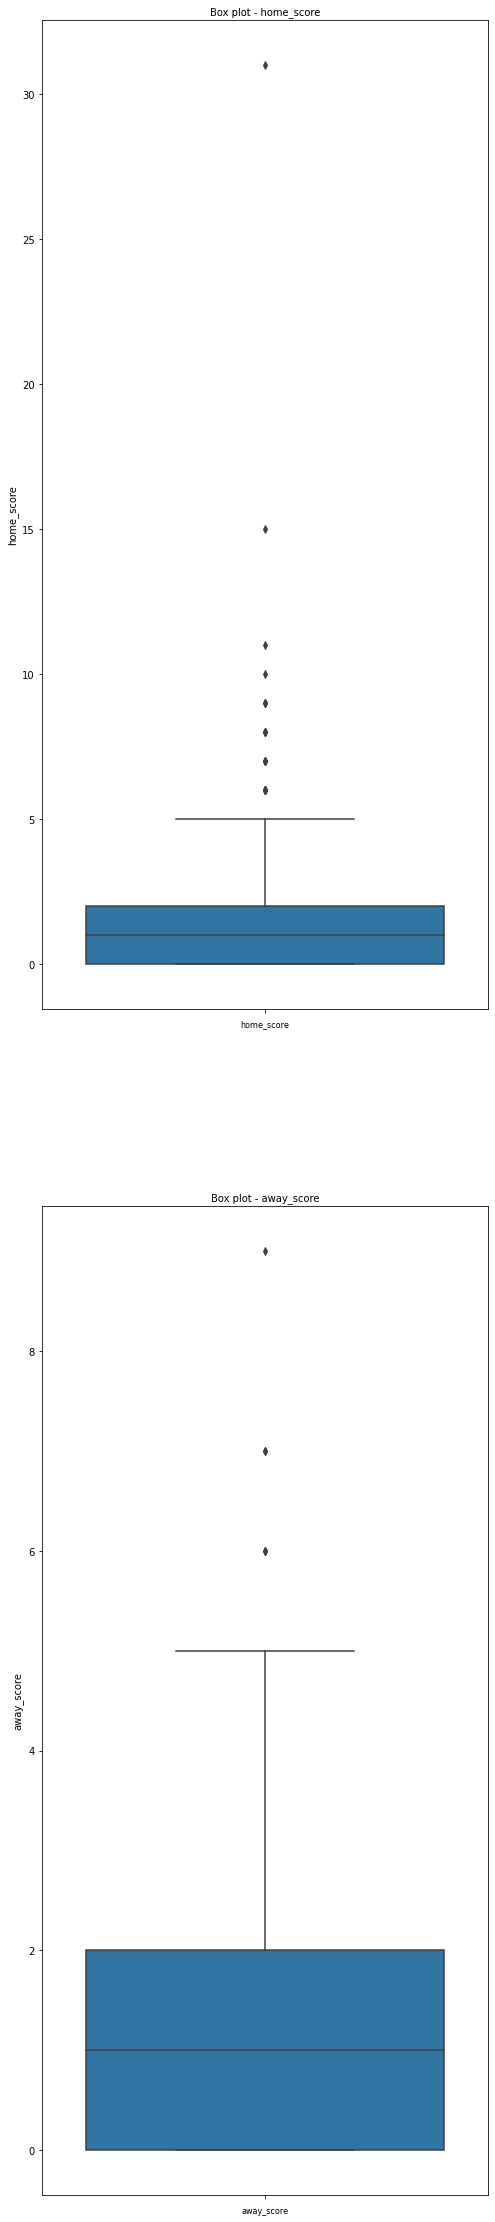

In [127]:
# 1. Outliers
# Check for outliers
column_names = ['home_score', 'away_score']

fig, ax = plt.subplots(len(column_names), figsize=(8,40))

for i, col_val in enumerate(column_names):
    sns.boxplot(y=results_df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

In [128]:
# Removing outliers
results_df = results_df[(np.abs(stats.zscore(results_df[['home_score', 'away_score']])) < 3).all(axis=1)]

In [129]:
# Records remaining after dropping null values
results_df.shape

(847, 27)

- Outliers were investigated dropped in the home team and away team goals only. 
- There was no need to investigate numerical columns such as rank and points since they are FIFA standadized scores
- A total of 24 records were dropped as outliers remaining with 847 records

### d). Creating new column indicating match result

In [130]:
# Creating column indicating home team wins, home team looses, or draw
# create a list of our conditions
conditions = [
    (results_df['home_score'] > results_df['away_score']),
    (results_df['home_score'] < results_df['away_score']),
    (results_df['home_score'] == results_df['away_score'])
    ]

# create a list of the values we want to assign for each condition
values = ['Home Win', 'Home loose', 'Draw']

# create a new column and use np.select to assign values to it using our lists as arguments
results_df['Result'] = np.select(conditions, values)

# display updated DataFrame
results_df.head()

,rank_home,total_points_home,previous_points_home,rank_change_home,cur_year_avg_home,cur_year_avg_weighted_home,last_year_avg_home,last_year_avg_weighted_home,two_year_ago_avg_home,two_year_ago_weighted_home,...,last_year_avg_away,last_year_avg_weighted_away,two_year_ago_avg_away,two_year_ago_weighted_away,three_year_ago_avg_away,three_year_ago_weighted_away,home_score,away_score,neutral,Result
0,59,0.000,13,28,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,3,1,False,Home Win
1,8,0.000,55,-5,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1,1,False,Draw
2,35,0.000,23,30,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,5,0,False,Home Win
3,65,0.000,23,-2,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1,0,False,Home Win
4,67,0.000,22,1,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,1,3,False,Home loose


### e). Validity

In [131]:
# Renaming columns appropiately
results_df = results_df.rename(columns={'rank_home': 'Home Team Rank', 
                                        'total_points_home': 'Total Points Home', 'previous_points_home': 'Previous Points Home', 
                                        'rank_change_home': 'Rank Change Home', 'cur_year_avg_home': 'Current Year Avg Home',
                                         'cur_year_avg_weighted_home': 'Cur Year Avge Weighted Home', 'last_year_avg_home': 'Last Year Avg Home',
                                        'last_year_avg_weighted_home': 'Last Year Avg Weighted Home', 'two_year_ago_avg_home': 'Two Year Ago Avg Home',
                                        'two_year_ago_weighted_home': 'Two Year Ago Weighted Home', 'three_year_ago_avg_home': 'Three Year Ago Avg Home',
                                        'three_year_ago_weighted_home': 'Three Year Ago Weighted Home',
                                        'confederation': 'Confederation', 
                                        'rank_away': 'Away Team RanK', 'total_points_away': 'Total Points Away', 
                                        'previous_points_away': 'Previous Points Away', 
                                        'rank_change_away': 'Rank Change Away', 'cur_year_avg_away': 'Current Year Avg Away',
                                         'cur_year_avg_weighted_away': 'Cur Year Avge Weighted Away', 'last_year_avg_away': 'Last Year Avg Away',
                                        'last_year_avg_weighted_away': 'Last Year Avg Weighted Away', 'two_year_ago_avg_away': 'Two Year Ago Avg Away',
                                        'two_year_ago_weighted_away': 'Two Year Ago Weighted Away', 'three_year_ago_avg_away': 'Three Year Ago Avg Away',
                                        'three_year_ago_weighted_away': 'Three Year Ago Weighted Away', 
                                        'home_score': 'Home Team Score', 'away_score': 'Away Team Score', 
                                        'neutral': 'Neutral', 'Result': 'Result'})

In [132]:
# Check column names
results_df.columns


Index(['Home Team Rank', 'Total Points Home', 'Previous Points Home',
       'Rank Change Home', 'Current Year Avg Home',
       'Cur Year Avge Weighted Home', 'Last Year Avg Home',
       'Last Year Avg Weighted Home', 'Two Year Ago Avg Home',
       'Two Year Ago Weighted Home', 'Three Year Ago Avg Home',
       'Three Year Ago Weighted Home', 'Away Team RanK', 'Total Points Away',
       'Previous Points Away', 'Rank Change Away', 'Current Year Avg Away',
       'Cur Year Avge Weighted Away', 'Last Year Avg Away',
       'Last Year Avg Weighted Away', 'Two Year Ago Avg Away',
       'Two Year Ago Weighted Away', 'Three Year Ago Avg Away',
       'Three Year Ago Weighted Away', 'Home Team Score', 'Away Team Score',
       'Neutral', 'Result'],
      dtype='object')

- All columns are now appropiately named

## Exploratory Data Analysis

### a) Univariate analysis

In [133]:
# Numerical data
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# dataframe with numeric data
numeric_df = results_df.select_dtypes(include=numerics)

# preview
numeric_df.head()

,Home Team Rank,Total Points Home,Previous Points Home,Rank Change Home,Current Year Avg Home,Cur Year Avge Weighted Home,Last Year Avg Home,Last Year Avg Weighted Home,Two Year Ago Avg Home,Two Year Ago Weighted Home,...,Current Year Avg Away,Cur Year Avge Weighted Away,Last Year Avg Away,Last Year Avg Weighted Away,Two Year Ago Avg Away,Two Year Ago Weighted Away,Three Year Ago Avg Away,Three Year Ago Weighted Away,Home Team Score,Away Team Score
0,59,0.000,13,28,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3,1
1,8,0.000,55,-5,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,1
2,35,0.000,23,30,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5,0
3,65,0.000,23,-2,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,0
4,67,0.000,22,1,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,3


In [134]:
# Describe data for mean, standard deviation and median
numeric_df.describe()

,Home Team Rank,Total Points Home,Previous Points Home,Rank Change Home,Current Year Avg Home,Cur Year Avge Weighted Home,Last Year Avg Home,Last Year Avg Weighted Home,Two Year Ago Avg Home,Two Year Ago Weighted Home,...,Current Year Avg Away,Cur Year Avge Weighted Away,Last Year Avg Away,Last Year Avg Weighted Away,Two Year Ago Avg Away,Two Year Ago Weighted Away,Three Year Ago Avg Away,Three Year Ago Weighted Away,Home Team Score,Away Team Score
count,847.000,847.000,847.000,847.000,847.000,847.000,847.000,847.000,847.000,847.000,...,847.000,847.000,847.000,847.000,847.000,847.000,847.000,847.000,847.000,847.000
mean,64.743,38.654,465.947,-0.128,19.983,19.983,18.649,9.325,19.060,5.718,...,15.199,15.199,15.573,7.787,16.207,4.862,15.484,3.097,1.514,0.953
std,47.063,162.057,303.190,4.232,85.065,85.065,86.431,43.216,82.417,24.725,...,70.906,70.906,70.059,35.029,74.377,22.313,69.690,13.938,1.379,1.005
min,1.000,0.000,0.000,-22.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,26.000,0.000,231.000,-2.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,56.000,0.000,491.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000
75%,95.000,0.000,655.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,2.000
max,201.000,1273.690,1683.000,30.000,788.680,788.680,1008.940,504.470,748.610,224.580,...,817.580,817.580,617.620,308.810,637.290,191.190,665.550,133.110,7.000,4.000


The results for the various attributes were as follows:
Mean:				
 - Home Team Rank = 64.742621	
 - Total Points Home = 38.654156	
 - Away Team RanK =	68.815821	
 - Total Points Away = 30.944298	
 - Home Team Score = 1.513577
 - Away Team Score = 0.952774

std: 			
 - Home Team Rank = 47.062906	
 - Total Points Home = 	162.057185
 - Away Team RanK =	49.692283
 - Total Points Away = 136.344243	
 - Home Team Score = 1.379345
 - Away Team Score = 1.004782

Median:56.000000	0.000000	61.000000	0.000000	1.000000	1.000000
 - Home Team Rank = 56.0	
 - Total Points Home = 0.0
 - Away Team RanK =	61.00
 - Total Points Away = 0.0
 - Home Team Score = 1.00
 - Away Team Score = 1.00


**Kurtosis**

In [135]:
# Calculation of Kurtosis per variable
numeric_df.kurtosis(axis=0, skipna=True, level=None, numeric_only=None) 

Home Team Rank                 -0.164
Total Points Home              27.171
Previous Points Home            0.344
Rank Change Home               11.480
Current Year Avg Home          28.481
Cur Year Avge Weighted Home    28.481
Last Year Avg Home             50.045
Last Year Avg Weighted Home    50.044
Two Year Ago Avg Home          29.524
Two Year Ago Weighted Home     29.523
Three Year Ago Avg Home        31.549
Three Year Ago Weighted Home   31.549
Away Team RanK                 -0.331
Total Points Away              32.196
Previous Points Away            1.453
Rank Change Away               20.429
Current Year Avg Away          45.241
Cur Year Avge Weighted Away    45.241
Last Year Avg Away             31.894
Last Year Avg Weighted Away    31.894
Two Year Ago Avg Away          33.800
Two Year Ago Weighted Away     33.800
Three Year Ago Avg Away        35.248
Three Year Ago Weighted Away   35.247
Home Team Score                 1.348
Away Team Score                 0.502
dtype: float

- All variables aside from the home team rank and away team rank variable had a positive skew. This implied that the variables had more tails than the normal distribution

- The home team rank and away team rank had a negative kurtosis. This implied it had less tails than a normal distribution.

**Skewness**

In [136]:
# Calculation of skewness per variable
numeric_df.skew(axis=0, skipna=True, level=None, numeric_only=None)

Home Team Rank                 0.752
Total Points Home              5.042
Previous Points Home           0.424
Rank Change Home               1.107
Current Year Avg Home          5.128
Cur Year Avge Weighted Home    5.128
Last Year Avg Home             6.426
Last Year Avg Weighted Home    6.426
Two Year Ago Avg Home          5.212
Two Year Ago Weighted Home     5.212
Three Year Ago Avg Home        5.368
Three Year Ago Weighted Home   5.368
Away Team RanK                 0.672
Total Points Away              5.453
Previous Points Away           0.810
Rank Change Away               0.409
Current Year Avg Away          6.229
Cur Year Avge Weighted Away    6.229
Last Year Avg Away             5.438
Last Year Avg Weighted Away    5.438
Two Year Ago Avg Away          5.596
Two Year Ago Weighted Away     5.596
Three Year Ago Avg Away        5.646
Three Year Ago Weighted Away   5.646
Home Team Score                1.100
Away Team Score                0.985
dtype: float64

- All attributes aside  had a positive skew(skewed to the right)
- Many attributes had skews of above 5.0

**Visualizations**

In [137]:
# Matches played in neutral and non_neutral grounds
results_df['Neutral'].value_counts()

False    716
True     131
Name: Neutral, dtype: int64

- 731 matches are played in non neutral grounds

- 131 matches are played in neutral grounds

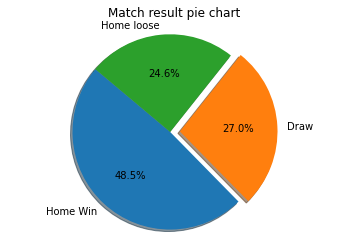

In [138]:
# Pie chart plot for match result
# Specifying result attribute for matches played in non neutral locations
result = results_df.loc[(results_df.Neutral == False)]['Result'].value_counts()

# Exploding one part of the pie chart
explode = (0, 0.1, 0)

# Plotting our pie chart
plt.pie(result, explode = explode, labels = result.index, autopct = '%1.1f%%', shadow = True, startangle = 140)

# Specifying axis type
plt.axis('equal')

# Set title
plt.title('Match result pie chart')

# Show plot
plt.show()

There are three possible outcomes in a football match, a win, draw or loose.

- Here we have three results, a home win, home loose and a draw
- The most common result is a home win 48.5% of the time
- Draws are the second most common result however they are almost similar to the percentage of away wins

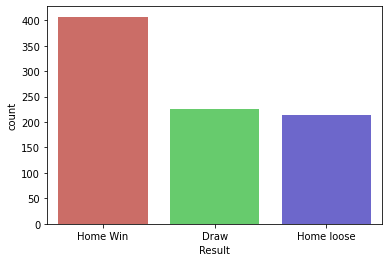

In [139]:
# Visualize our target variable if it is multinomial
sns.countplot(x='Result',data=results_df, palette='hls')

There are three items in the result one of the target variables in the data set. (Home win, Draw, Home Lose)


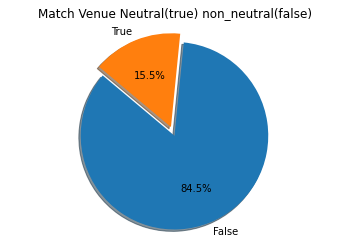

In [140]:
# pie chart of matches held in neutral venues vs those in non_neutral venues
# Pie chart plot for match result
# Specifying result attribute for matches played in non neutral locations
result = results_df['Neutral'].value_counts()

# Exploding one part of the pie chart
explode = (0, 0.1)

# Plotting our pie chart
plt.pie(result, explode = explode, labels = result.index, autopct = '%1.1f%%', shadow = True, startangle = 140)

# Specifying axis type
plt.axis('equal')

# Set title
plt.title('Match Venue Neutral(true) non_neutral(false)')

# Show plot
plt.show()

- 84.5% of all matches were held in non_neutral grounds
- 15.5% were held in neutral venues

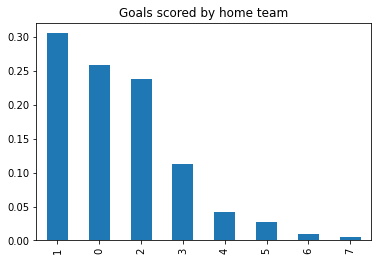

In [141]:
# Bar chart representing the various home team scores
(results_df['Home Team Score'].value_counts() / len(results_df['Home Team Score'])).plot.bar(title='Goals scored by home team')

- The most common score by home team is 1 goal slightly over 30% of the time
- The three most common scores by home team: 1, 0, and 2 goals
- The three least common scores by home team: 5, 6, 7
- The score range of home team (0 - 7 goals)

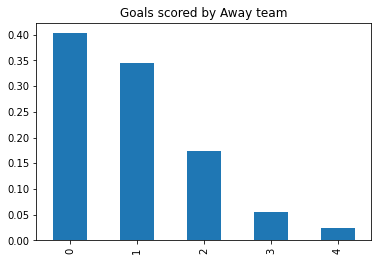

In [142]:
# Bar chart representing the various Away team scores
(results_df['Away Team Score'].value_counts() / len(results_df['Away Team Score'])).plot.bar(title='Goals scored by Away team')

- The most common score by away team is 0 goals around 40% of the time
- The three most common scores by away team: 0, 1, and 2 goals
- The three least common scores by away team: 2,3, 4
- The score range of away team (0 - 4 goals)

### b). Bivariant Analysis

**Correlations**

In [143]:
# Correlations of numerical data
results_df.corr()

,Home Team Rank,Total Points Home,Previous Points Home,Rank Change Home,Current Year Avg Home,Cur Year Avge Weighted Home,Last Year Avg Home,Last Year Avg Weighted Home,Two Year Ago Avg Home,Two Year Ago Weighted Home,...,Cur Year Avge Weighted Away,Last Year Avg Away,Last Year Avg Weighted Away,Two Year Ago Avg Away,Two Year Ago Weighted Away,Three Year Ago Avg Away,Three Year Ago Weighted Away,Home Team Score,Away Team Score,Neutral
Home Team Rank,1.000,-0.062,-0.612,-0.051,-0.060,-0.060,-0.066,-0.066,-0.058,-0.058,...,0.020,0.036,0.036,0.018,0.018,0.038,0.038,-0.086,0.089,0.035
Total Points Home,-0.062,1.000,0.200,-0.020,0.978,0.978,0.932,0.932,0.966,0.966,...,0.743,0.772,0.772,0.776,0.776,0.761,0.761,0.061,-0.064,0.026
Previous Points Home,-0.612,0.200,1.000,-0.026,0.192,0.192,0.197,0.197,0.192,0.192,...,0.096,0.100,0.100,0.111,0.111,0.094,0.094,0.024,-0.090,0.042
Rank Change Home,-0.051,-0.020,-0.026,1.000,-0.015,-0.015,-0.027,-0.027,-0.019,-0.019,...,-0.033,-0.013,-0.013,-0.038,-0.038,-0.015,-0.015,0.066,-0.019,-0.003
Current Year Avg Home,-0.060,0.978,0.192,-0.015,1.000,1.000,0.845,0.845,0.916,0.916,...,0.716,0.744,0.744,0.745,0.745,0.739,0.739,0.058,-0.058,0.029
Cur Year Avge Weighted Home,-0.060,0.978,0.192,-0.015,1.000,1.000,0.845,0.845,0.916,0.916,...,0.716,0.744,0.744,0.745,0.745,0.739,0.739,0.058,-0.058,0.029
Last Year Avg Home,-0.066,0.932,0.197,-0.027,0.845,0.845,1.000,1.000,0.921,0.921,...,0.712,0.735,0.735,0.738,0.738,0.714,0.714,0.056,-0.059,0.020
Last Year Avg Weighted Home,-0.066,0.932,0.197,-0.027,0.845,0.845,1.000,1.000,0.921,0.921,...,0.712,0.735,0.735,0.738,0.738,0.714,0.714,0.056,-0.059,0.020
Two Year Ago Avg Home,-0.058,0.966,0.192,-0.019,0.916,0.916,0.921,0.921,1.000,1.000,...,0.742,0.772,0.772,0.780,0.780,0.737,0.737,0.054,-0.066,0.021
Two Year Ago Weighted Home,-0.058,0.966,0.192,-0.019,0.916,0.916,0.921,0.921,1.000,1.000,...,0.742,0.772,0.772,0.780,0.780,0.737,0.737,0.054,-0.066,0.021


- Away team rank and home team rank are the most correlated

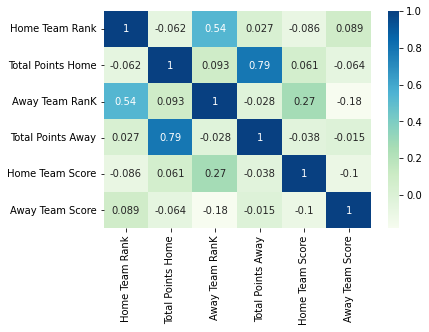

In [144]:
# Numeric df with result
numeric_df = results_df[['Home Team Rank', 'Total Points Home', 'Away Team RanK',
       'Total Points Away', 'Home Team Score', 'Away Team Score', 'Result']]

# Correlation
correlation=numeric_df.corr()
sns.heatmap(correlation,annot=True,cmap="GnBu")

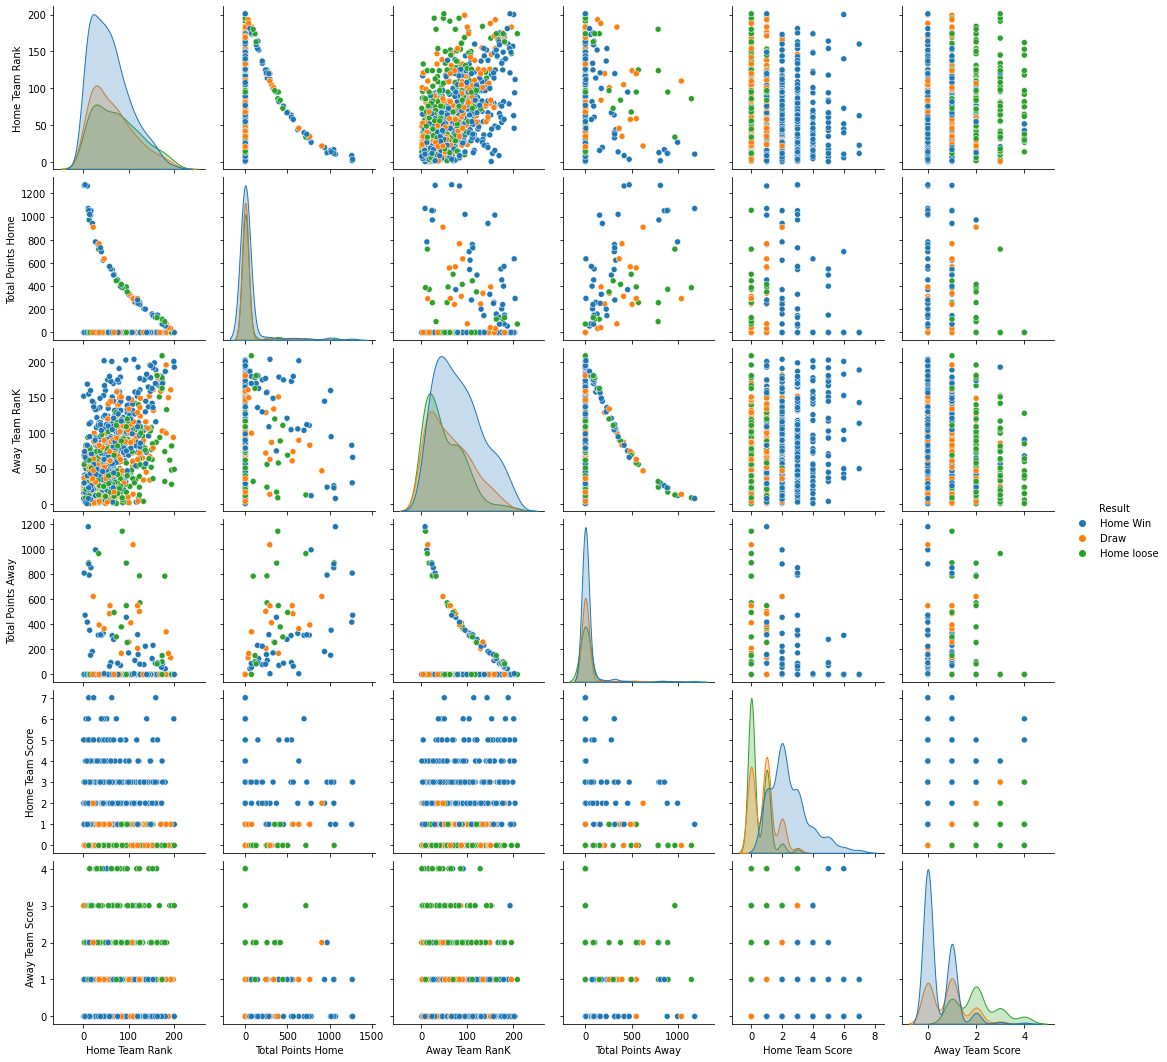

In [145]:
# Pairplots
sns.pairplot(numeric_df, hue="Result")

- From the plot it is clear that the home team rannk and way team rank are correlated to some extent
- Most of the attributes seem to have a low or no correlataion amongst each other
- The higher the a team scores the higher its likelhood to win a match
- The higher an away team scores the lower the chances if an home team winning

### c). Multicolinearity

In [146]:
# # Dropping the columns of interest
# df = results_df.drop(columns=['Home Team Score', 'Away Team Score', 'Result', 'Neutral'])

# Correlations of varibales
correlations = results_df.corr()

correlations

,Home Team Rank,Total Points Home,Previous Points Home,Rank Change Home,Current Year Avg Home,Cur Year Avge Weighted Home,Last Year Avg Home,Last Year Avg Weighted Home,Two Year Ago Avg Home,Two Year Ago Weighted Home,...,Cur Year Avge Weighted Away,Last Year Avg Away,Last Year Avg Weighted Away,Two Year Ago Avg Away,Two Year Ago Weighted Away,Three Year Ago Avg Away,Three Year Ago Weighted Away,Home Team Score,Away Team Score,Neutral
Home Team Rank,1.000,-0.062,-0.612,-0.051,-0.060,-0.060,-0.066,-0.066,-0.058,-0.058,...,0.020,0.036,0.036,0.018,0.018,0.038,0.038,-0.086,0.089,0.035
Total Points Home,-0.062,1.000,0.200,-0.020,0.978,0.978,0.932,0.932,0.966,0.966,...,0.743,0.772,0.772,0.776,0.776,0.761,0.761,0.061,-0.064,0.026
Previous Points Home,-0.612,0.200,1.000,-0.026,0.192,0.192,0.197,0.197,0.192,0.192,...,0.096,0.100,0.100,0.111,0.111,0.094,0.094,0.024,-0.090,0.042
Rank Change Home,-0.051,-0.020,-0.026,1.000,-0.015,-0.015,-0.027,-0.027,-0.019,-0.019,...,-0.033,-0.013,-0.013,-0.038,-0.038,-0.015,-0.015,0.066,-0.019,-0.003
Current Year Avg Home,-0.060,0.978,0.192,-0.015,1.000,1.000,0.845,0.845,0.916,0.916,...,0.716,0.744,0.744,0.745,0.745,0.739,0.739,0.058,-0.058,0.029
Cur Year Avge Weighted Home,-0.060,0.978,0.192,-0.015,1.000,1.000,0.845,0.845,0.916,0.916,...,0.716,0.744,0.744,0.745,0.745,0.739,0.739,0.058,-0.058,0.029
Last Year Avg Home,-0.066,0.932,0.197,-0.027,0.845,0.845,1.000,1.000,0.921,0.921,...,0.712,0.735,0.735,0.738,0.738,0.714,0.714,0.056,-0.059,0.020
Last Year Avg Weighted Home,-0.066,0.932,0.197,-0.027,0.845,0.845,1.000,1.000,0.921,0.921,...,0.712,0.735,0.735,0.738,0.738,0.714,0.714,0.056,-0.059,0.020
Two Year Ago Avg Home,-0.058,0.966,0.192,-0.019,0.916,0.916,0.921,0.921,1.000,1.000,...,0.742,0.772,0.772,0.780,0.780,0.737,0.737,0.054,-0.066,0.021
Two Year Ago Weighted Home,-0.058,0.966,0.192,-0.019,0.916,0.916,0.921,0.921,1.000,1.000,...,0.742,0.772,0.772,0.780,0.780,0.737,0.737,0.054,-0.066,0.021


A couple of columns had a perfect coreelation of 1.000
They included: 

- Current Year Avg Home and Cur Year Avge Weighted Home
- Last Year Avg Home and Last Year Avg Weighted Home
- Two Year Ago Avg Home and Two Year Ago Weighted Home
- Three Year Ago Avg Home and Three Year Ago Weighted Home
- Current Year Avg Away and Cur Year Avge Weighted Away
- Last Year Avg Away and Last Year Avg Weighted Away
- Two Year Ago Avg Away and Two Year Ago Weighted Away
- Three Year Ago Avg Away and Three Year Ago Weighted Away

The weighted value in the two highly correlated values shall be dropped

Other columns expressed a high correlation o over 0.9 amongst each other. These columns are:

1. Total Points Home, Current Year Avg Home,Last Year Avg Home, Two Year Ago Avg Home, and Three Year Ago Avg Home

2. Total Points Away, Current Year Avg Away,Last Year Avg Away, Two Year Ago Avg Away, and Three Year Ago Avg Away

For the first set of correlated variables, all will be dropped excluding Total points at home. The same will apply for the second set where all will be dropped exclduing total points away

In [147]:
# Dropping one of the highly correlated sets
results_df1 = results_df.drop(columns = ['Cur Year Avge Weighted Home','Last Year Avg Weighted Home', 'Two Year Ago Weighted Home', 'Three Year Ago Weighted Home',
                                         'Cur Year Avge Weighted Away','Last Year Avg Weighted Away', 'Two Year Ago Weighted Away', 'Three Year Ago Weighted Away',
                                         'Current Year Avg Home','Last Year Avg Home', 'Two Year Ago Avg Home', 'Three Year Ago Avg Home',
                                         'Current Year Avg Away','Last Year Avg Away', 'Two Year Ago Avg Away', 'Three Year Ago Avg Away'])

In [148]:
# Correlations of varibales
correlations = results_df1.corr()

correlations

,Home Team Rank,Total Points Home,Previous Points Home,Rank Change Home,Away Team RanK,Total Points Away,Previous Points Away,Rank Change Away,Home Team Score,Away Team Score,Neutral
Home Team Rank,1.000,-0.062,-0.612,-0.051,0.538,0.027,-0.321,0.034,-0.086,0.089,0.035
Total Points Home,-0.062,1.000,0.200,-0.020,0.093,0.790,0.021,-0.017,0.061,-0.064,0.026
Previous Points Home,-0.612,0.200,1.000,-0.026,-0.284,0.103,0.669,-0.051,0.024,-0.090,0.042
Rank Change Home,-0.051,-0.020,-0.026,1.000,-0.003,-0.028,0.003,0.066,0.066,-0.019,-0.003
Away Team RanK,0.538,0.093,-0.284,-0.003,1.000,-0.028,-0.601,-0.025,0.273,-0.182,0.062
Total Points Away,0.027,0.790,0.103,-0.028,-0.028,1.000,0.124,0.024,-0.038,-0.015,0.025
Previous Points Away,-0.321,0.021,0.669,0.003,-0.601,0.124,1.000,-0.056,-0.196,0.087,0.008
Rank Change Away,0.034,-0.017,-0.051,0.066,-0.025,0.024,-0.056,1.000,0.037,0.021,0.024
Home Team Score,-0.086,0.061,0.024,0.066,0.273,-0.038,-0.196,0.037,1.000,-0.103,0.014
Away Team Score,0.089,-0.064,-0.090,-0.019,-0.182,-0.015,0.087,0.021,-0.103,1.000,0.062


Most of the remaining attributes after dropping the highly correlated attributes are loosely correlated hence will provide more insights in the subsequent modelling

In [149]:
# python suppress exponential notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# VIF scores
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)


,Home Team Rank,Total Points Home,Previous Points Home,Rank Change Home,Away Team RanK,Total Points Away,Previous Points Away,Rank Change Away,Home Team Score,Away Team Score,Neutral
Home Team Rank,3.597,0.039,2.956,0.229,-2.663,-0.196,-2.297,-0.187,0.469,-0.280,-0.045
Total Points Home,0.039,3.176,-0.897,-0.034,-0.176,-2.521,0.747,0.109,-0.073,-0.026,0.022
Previous Points Home,2.956,-0.897,4.718,0.276,-2.394,0.553,-3.682,-0.176,0.140,0.026,-0.111
Rank Change Home,0.229,-0.034,0.276,1.028,-0.163,0.046,-0.232,-0.078,-0.048,0.009,-0.002
Away Team RanK,-2.663,-0.176,-2.394,-0.163,3.706,0.186,2.825,0.239,-0.569,0.380,-0.082
Total Points Away,-0.196,-2.521,0.553,0.046,0.186,3.031,-0.642,-0.117,0.068,0.052,-0.035
Previous Points Away,-2.297,0.747,-3.682,-0.232,2.825,-0.642,4.489,0.258,-0.062,0.019,0.011
Rank Change Away,-0.187,0.109,-0.176,-0.078,0.239,-0.117,0.258,1.031,-0.070,-0.002,-0.027
Home Team Score,0.469,-0.073,0.140,-0.048,-0.569,0.068,-0.062,-0.070,1.192,-0.008,-0.000
Away Team Score,-0.280,-0.026,0.026,0.009,0.380,0.052,0.019,-0.002,-0.008,1.098,-0.084


All attributes had a VIF score lower than five. Previous points home had the highest VIF score of 4.718. Previous points away had the highest VIF score of 4.489. 

## Encoding

The remaining categorical varaible is the result that has three objects(Home win, draw, or home loose)

These variables are few in number hence shall be label encoded

In [150]:
#Encoding Catergorical data
encoder = LabelEncoder()

# Encoding neutral in dataset
results_df1['Neutral'] = encoder.fit_transform(results_df1['Neutral'])
results_df1.head()

,Home Team Rank,Total Points Home,Previous Points Home,Rank Change Home,Away Team RanK,Total Points Away,Previous Points Away,Rank Change Away,Home Team Score,Away Team Score,Neutral,Result
0,59,0.000,13,28,22,0.000,47,-6,3,1,0,Home Win
1,8,0.000,55,-5,14,0.000,42,11,1,1,0,Draw
2,35,0.000,23,30,94,0.000,4,31,5,0,0,Home Win
3,65,0.000,23,-2,86,0.000,16,-7,1,0,0,Home Win
4,67,0.000,22,1,5,0.000,51,5,1,3,0,Home loose


## Home Team Score analysis

In [151]:
# Defining attributes
X = results_df1.drop(columns = ['Home Team Score', 'Away Team Score', 'Result'])

# Defining the target Variable
y = results_df1['Home Team Score']

### a). Scaling data

In [152]:
# Defening Scalar
scalar = preprocessing.StandardScaler()

# Scaling
results_scaled = scalar.fit_transform(X)

# Getting the scaled attributes as a dataframe
X = pd.DataFrame(results_scaled, index=X.index, columns=X.columns)

### b) Univariate selection

In [153]:
# Specifying bestfeatures
bestfeatures = SelectKBest(score_func = f_classif, k=8)

# Fit bestfeatures
fit = bestfeatures.fit(X, y)

# Scores
dfscores = pd.DataFrame(fit.scores_)

# Columns
dfcolumns = pd.DataFrame(X.columns)

# Featurescores

featurescores = pd.concat([dfcolumns, dfscores], axis =1)

# Rename featurescores columns
featurescores.columns = ['Specs', 'Score']

# Preview featurescores descending order
featurescores.sort_values(by='Score', ascending=False)

,Specs,Score
4,Away Team RanK,10.287
6,Previous Points Away,5.604
3,Rank Change Home,4.392
0,Home Team Rank,2.485
1,Total Points Home,1.815
2,Previous Points Home,1.418
8,Neutral,1.113
7,Rank Change Away,1.087
5,Total Points Away,1.049


Most important features and their scores:

1. Away Team RanK	10.287
2. Previous Points Away	5.604
3. Rank Change Home	4.392

Least important features and their scores:

3. Neutral	1.113
2. Rank Change Away	1.087
1. Total Points Away	1.049

### c). Linear regression for home team goals

In [154]:
# Defining attributes
X1 = X.values

# Defining the target Variable
y = y.values

# Train using 20% of the data.
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print(regressor.coef_)

y_pred = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



[-0.48435168  0.06470085 -0.07966069  0.02523632  0.57113475 -0.06749546
  0.00931297  0.05928294  0.01961404]
Mean Absolute Error: 0.9939148227834393
Mean Squared Error: 1.522545981816948
Root Mean Squared Error: 1.2339149005571446


- Applying the linear regression model to our data, the RMSE value way higher than 10% of mean of home team goals(0.1515). This model is highly inaccurate.

- Underfitting of the data is suspected. Polynomial regression shall be employed to investigate this further

### d). Polynomial regression for home team goals

In [155]:
# Defining attributes
X = results_df1.drop(columns = ['Home Team Score', 'Away Team Score', 'Result'])

# Defining the target Variable
y = results_df1['Home Team Score']

# Train(30% of data) and test sets (70% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


**Polynomial degree = 2**

In [156]:
# "Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
poly_model = LinearRegression()

poly_model.fit(X_train_poly, y_train)
     
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
   
# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))

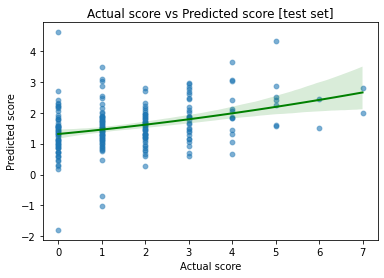

In [157]:
# Scatter plot y_train, y_train_predicted,
sns.scatterplot(y_test, y_test_predicted, alpha=0.4)

# Ploting data and a linear regression model fit.
sns.regplot(y_test, y_test_predicted, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
 
# Labelling X axis
plt.xlabel("Actual score")

# Labelling Y axis
plt.ylabel("Predicted score")

# Naming the plot
plt.title("Actual score vs Predicted score [test set]")
 
# Showwing the plot
plt.show()

The plot seems to show there is no way one can increase the polynomial degree without overfitting the data

In [158]:
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
  
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
r2_test = r2_score(y_test, y_test_predicted)
  
print("The model performance for the test set")
print("-------------------------------------------")
print(f"RMSE test set is {rmse_test}")
print(f"R2 score test set is {r2_train}")

print("\n")
  
print("The model performance for the training set")
print("-------------------------------------------")
print(f"RMSE test set is {rmse_train}")
print(f"R2 score test set is {r2_test}")

The model performance for the test set
-------------------------------------------
RMSE test set is 1.3726222788592353
R2 score test set is 0.20025869438088384


The model performance for the training set
-------------------------------------------
RMSE test set is 1.207809040809962
R2 score test set is 0.09303318681257511


Employing a polynomial degree of 2 the RMSE of test set decreased further compared to that in the linear regression model. This implied and increase in model in accuracy.

The RMSE of the test set was higher than that of the train set an indicator of overfitting 

Hence the linear regression model shall be selected and explored/challenged further by dropping least imortant features



### e). Cross Validation

In [159]:
# Defining the features
X = results_df1.drop(columns = ['Home Team Score', 'Away Team Score', 'Result']).values

# Defining the target Variable
y = results_df1['Home Team Score'].values

folds = KFold(n_splits=10)

# Printing number of splits obtaine
print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# Asseing the 10 models created
# Defining RMSES
RMSES = [] 

# Specifying count
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
# Setting up train and test set defined by kfold split of 10
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # Fitting linear regression model
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # Assessing model accuracy
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 1.4025447773323454

Training model 2
Model 2 Root Mean Squared Error: 1.2881706375152042

Training model 3
Model 3 Root Mean Squared Error: 1.3441041261944255

Training model 4
Model 4 Root Mean Squared Error: 1.2520494436115688

Training model 5
Model 5 Root Mean Squared Error: 1.5765675802213164

Training model 6
Model 6 Root Mean Squared Error: 1.1651143347536683

Training model 7
Model 7 Root Mean Squared Error: 1.0562343719436875

Training model 8
Model 8 Root Mean Squared Error: 1.1461967952249388

Training model 9
Model 9 Root Mean Squared Error: 1.1767534740177292

Training model 10
Model 10 Root Mean Squared Error: 1.3645169976649971


The RMSE value of model 5 is fairly larger than the RMSE values of the other models. This would beg for an analysis of the specific indeces used.

In [160]:
# Mean of RMSES
np.mean(RMSES)

1.2772252538479882

The average RMSE value of the splits is slightly larger(fairly comparable) to that of the linear regression model. However model 10 had a way lower RMSE value than the linear regression model(0.763).

Model 7 shall be picked as the desired model

### f). Residual plots and heteroskedasticity testing

In [161]:
# Residual plots
# Defining the features
X = results_df1.drop(columns = ['Home Team Score', 'Away Team Score', 'Result']).values

# Defining the target Variable
y = results_df1['Home Team Score'].values

# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Defining regressor
regressor = LinearRegression()

# Fitting X and y train
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

,0
count,170.000
mean,0.033
std,1.237
min,-4.297
25%,-0.758
50%,0.219
75%,0.968
max,2.421


The min is fairly low and the max for the residual are fairly high: the min suggests the model been up to 430% off target and the max suggests the model been up to 350% off target.This devoation is too high and needs to be investigated whether it is a common occurence, or a few outliers?

The mean on the other hand is close to 0, indicating that we tend to be fairly correct, although slightly over estimating chances by, on average, 3.3%

A residual plot shall be plotted to investigate this further

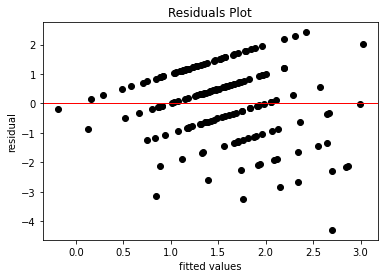

In [162]:
# Residual plot
plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.title('Residuals Plot')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

This does not look too bad: the residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns. 

To affirm this a heteroskedacity test shall be performed

In [163]:
# heteroskedacity test
test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# Computing a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# Creating and testing hypothesis
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


Hence it can be affirmed that the variances are by chance not by any underlying issues or bias

### g). Challenging solution

The linear regression model shall be challenged by dropping the least important feature total points away

In [164]:
# Defining the features
X = results_df1.drop(columns = ['Home Team Score', 'Away Team Score', 'Result', 'Total Points Away' ]).values

# Defining the target Variable
y = results_df1['Home Team Score'].values

# Train(30% of data) and test sets (70% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [165]:
# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print(regressor.coef_)

y_pred = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


[-1.15049100e-02  1.95737986e-04 -4.01306697e-04 -6.49650656e-03
  1.13414069e-02 -1.07011926e-06  5.01877268e-04  8.34165443e-02]
Mean Absolute Error: 1.0329602868272607
Mean Squared Error: 1.6953106261670186
Root Mean Squared Error test: 1.302040946424888


The RMSE value upon dropping the least important feature increased from 1.234 to 1.302. This implies an increase in inaccuracy

Hence it can be concluded that the features present are all contributing to the accuracy of the model

## Away Team Score Analysis

In [166]:
# Defining the features
Xa = results_df1.drop(columns = ['Home Team Score', 'Away Team Score', 'Result'])

# Defining the target Variable
y = results_df1['Away Team Score']

### a). Scaling data

In [167]:
# Defening Scalar
scalar = preprocessing.StandardScaler()

# Scaling
results_scaled = scalar.fit_transform(Xa)

# Getting the scaled attributes as a dataframe
Xa = pd.DataFrame(results_scaled, index=Xa.index, columns=Xa.columns)

### b). Univariate selection

In [168]:
# Specifying bestfeatures
bestfeatures = SelectKBest(score_func = f_classif, k=8)

# Fit bestfeatures
fit = bestfeatures.fit(Xa, y)

# Scores
dfscores = pd.DataFrame(fit.scores_)

# Columns
dfcolumns = pd.DataFrame(Xa.columns)

# Featurescores

featurescores = pd.concat([dfcolumns, dfscores], axis =1)

# Rename featurescores columns
featurescores.columns = ['Specs', 'Score']

# Preview featurescores descending order
featurescores.sort_values(by='Score', ascending=False)

,Specs,Score
4,Away Team RanK,8.008
6,Previous Points Away,3.710
0,Home Team Rank,2.689
2,Previous Points Home,2.412
8,Neutral,1.528
3,Rank Change Home,1.369
1,Total Points Home,0.935
7,Rank Change Away,0.539
5,Total Points Away,0.429


Most important features and their respective score:

1. Away Team RanK	8.008
2. Previous Points Away	3.710
3. Home Team Rank	2.689

Least important features and their scores:

1. Total Points Home	0.935
2. Rank Change Away	0.539
3. Total Points Away	0.429

### c) Linear regression for home team goals

In [169]:
# Defining attributes
X2 = Xa.values

# Defining the target Variable
y2 = y.values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=0)

# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print(regressor.coef_)

y_pred = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


[ 0.26356486  0.04089133 -0.04305738 -0.00984187 -0.353502   -0.05450716
 -0.00508788 -0.00738222  0.10159089]
Mean Absolute Error: 0.7405368225969631
Mean Squared Error: 0.8908635690471695
Root Mean Squared Error test: 0.943855692914531


In [170]:
# Average of away team goals
results_df1['Away Team Score'].mean()

0.9527744982290437

The RMSE of the  test set is almost equal to the mean of away team goals. This shows the model is very inaccurate The model is very inaccurate and might be due to underfitting of data

To investigate for underfitting polynomial regression shall be employed


### d). Polynomial regression for home team goals

In [171]:
# Defining attributes
Xa = results_df1.drop(columns = ['Home Team Score', 'Away Team Score', 'Result'])

# Defining the target Variable
y = results_df1['Away Team Score']

# Train(30% of data) and test sets (70% of data)
X_train, X_test, y_train, y_test = train_test_split(Xa, y, test_size=0.3, random_state=0)


**Polynomial degree = 2**

In [172]:
# "Creates a polynomial regression model for the given degree"
poly_features = PolynomialFeatures(degree=2)
   
# transform the features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)
   
# fit the transformed features to Linear Regression
poly_model = LinearRegression()

poly_model.fit(X_train_poly, y_train)
     
# predicting on training data-set
y_train_predicted = poly_model.predict(X_train_poly)
   
# predicting on test data-set
y_test_predicted = poly_model.predict(poly_features.fit_transform(X_test))

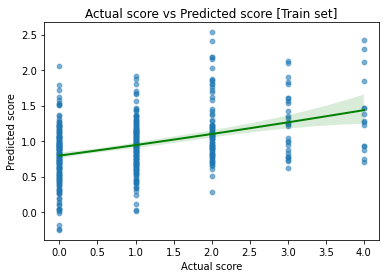

In [173]:
# Scatter plot y_train, y_train_predicted,
sns.scatterplot(y_train, y_train_predicted, alpha=0.4)

# Ploting data and a linear regression model fit.
sns.regplot(y_train, y_train_predicted, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2}, order=2)
 
# Labelling X axis
plt.xlabel("Actual score")

# Labelling Y axis
plt.ylabel("Predicted score")

# Naming the plot
plt.title("Actual score vs Predicted score [Train set]")
 
# Showwing the plot
plt.show()

The plot seems to show there is no way one can increase the polynomial degree without 0verfitting the data

In [174]:
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
r2_train = r2_score(y_train, y_train_predicted)
  
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predicted))
r2_test = r2_score(y_test, y_test_predicted)

print("The model performance for the test set")
print("-------------------------------------------")
print(f"RMSE test set is {rmse_test}")
print(f"R2 score test set is {r2_train}")

print("\n")
  
print("The model performance for the training set")
print("-------------------------------------------")
print(f"RMSE test set is {rmse_train}")
print(f"R2 score test set is {r2_test}")

The model performance for the test set
-------------------------------------------
RMSE test set is 1.0557423693845884
R2 score test set is 0.15557849370602683


The model performance for the training set
-------------------------------------------
RMSE test set is 0.9147916821584904
R2 score test set is -0.06463866240905558


The RMSE of the test sets exceeds that of the train set. This is an indiaction of overfitting. This implies with the data we have it is not possible for the model to accurately predict the the outcome of away team goals

**Hence we shall stick with the linear regression model**

### e). Cross Validation

In [175]:
# Defining the features
Xa = results_df1.drop(columns = ['Home Team Score', 'Away Team Score', 'Result']).values

# Defining the target Variable
y = results_df1['Away Team Score'].values

folds = KFold(n_splits=10)

# Printing number of splits obtaine
print('we are using ' +str(folds.get_n_splits(Xa)) + ' folds')

# Asseing the 10 models created
# Defining RMSES
RMSES = [] 

# Specifying count
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
# Setting up train and test set defined by kfold split of 10
  X_train, X_test = Xa[train_index], Xa[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # Fitting linear regression model
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # Assessing model accuracy
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 10 folds

Training model 1
Model 1 Root Mean Squared Error: 1.173772216864076

Training model 2
Model 2 Root Mean Squared Error: 0.9749615589813768

Training model 3
Model 3 Root Mean Squared Error: 0.9635717149328928

Training model 4
Model 4 Root Mean Squared Error: 1.0379787720337936

Training model 5
Model 5 Root Mean Squared Error: 0.8929611177564839

Training model 6
Model 6 Root Mean Squared Error: 1.036565569107475

Training model 7
Model 7 Root Mean Squared Error: 1.0353813518344306

Training model 8
Model 8 Root Mean Squared Error: 0.8503747600080956

Training model 9
Model 9 Root Mean Squared Error: 0.9588542709721256

Training model 10
Model 10 Root Mean Squared Error: 0.7629966809272278


The RMSE value of model one is fairly larger than the RMSE values of the other models. This would beg for an analysis of the specific indeces used.

In [176]:
# Mean of RMSES
np.mean(RMSES)

0.9687418013417979

The average RMSE value of the splits is slightly larger(fairly comparable) to that of the linear regression model. However model 10 had a way lower RMSE value than the linear regression model(0.763).

Model 10 shall be picked as the desired model

### f). Residual plots and heteroskedasticity testing

In [177]:
# Residual plots
# Defining the features
X = results_df1.drop(columns = ['Home Team Score', 'Away Team Score', 'Result']).values

# Defining the target Variable
y = results_df1['Away Team Score'].values

# Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Defining regressor
regressor = LinearRegression()

# Fitting X and y train
regressor.fit(X_train, y_train)

# This is our prediction for admission based on our model
y_predict = regressor.predict(X_test)

# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_predict, y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

,0
count,170.000
mean,-0.021
std,0.946
min,-3.226
25%,-0.585
50%,0.109
75%,0.688
max,1.572


The min is fairly low and the max for the residual are fairly high: the min suggests the model been up to 330% off target and the max suggests the model been up to 275% off target.This devoation is too high and needs to be investigated whether it is a common occurence, or a few outliers?

The mean on the other hand is close to 0, indicating that we tend to be fairly correct, although slightly over estimating chances by, on average, -2.1%

A residual plot shall be plotted to investigate this further

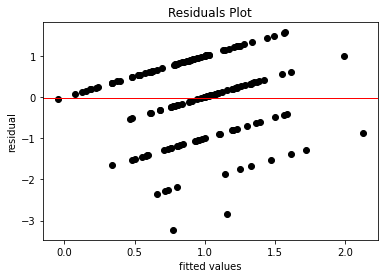

In [178]:
# Residual plot
plt.scatter(y_predict, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.title('Residuals Plot')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

This does not look too bad: the residuals are centered around a mean that is very close to 0, and there are no glaringly obvious patterns.

To affirm this a heteroskedacity test shall be performed

In [179]:
# heteroskedacity test
test_result, p_value = sp.stats.bartlett(y_predict, residuals)

# Computing a critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# Creating and testing hypothesis
if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

inf
the variances are homogeneous!


Hence it can be affirmed that the variances are by chance not by any underlying issues or bias

### g). Challenging solution

Linear regression model shall be challenged by dropping the least important feature 'Total Points Away '

In [180]:
# Defining the features
X = results_df1.drop(columns = ['Home Team Score', 'Away Team Score', 'Result', 'Total Points Away' ]).values

# Defining the target Variable
y = results_df1['Away Team Score'].values

# Train(30% of data) and test sets (70% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [181]:
# find optimal coefficients and intercept
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

print(regressor.coef_)

y_pred = regressor.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})

comparison_frame.describe()

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error test:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


[ 5.41091152e-03 -1.17979027e-04 -2.65631571e-05 -3.65460199e-03
 -7.28494530e-03 -1.52260769e-04 -5.86583266e-03  2.71977905e-01]
Mean Absolute Error: 0.7616831115274723
Mean Squared Error: 0.9591560619870826
Root Mean Squared Error test: 0.9793651321070618


The RMSE value upon dropping the least important feature increased from 0.944 to 0.979. This implies an increase in inaccuracy

Hence it can be concluded that the features present are all contributing to the accuracy of the model

## Logistic regression match result

- Logistic regression will be applied to determine the outcome of a match result whether a home team wins or an away team wins or the match ends in a draw

- Multinomial Logistic Regression shall be applied since the target variable has three outcomes(home win, home lose, draw) as visualized in the univariate analysis

In [182]:
# Specifying feature variables
X = results_df1.drop(['Home Team Score', 'Away Team Score', 'Result'], axis=1) 

# Target variable
y = results_df1['Result']

print(list(X.columns.values)) 

['Home Team Rank', 'Total Points Home', 'Previous Points Home', 'Rank Change Home', 'Away Team RanK', 'Total Points Away', 'Previous Points Away', 'Rank Change Away', 'Neutral']


### a). Scaling data

In [183]:
# Importing Preprocessing from sklearn
from sklearn import preprocessing

# Defening Scalar
scalar = preprocessing.StandardScaler()

# Scaling
results_scaled = scalar.fit_transform(X)

# Getting the scaled attributes as a dataframe
Xa = pd.DataFrame(results_scaled, index=X.index, columns=X.columns)

### b) Feature selection

In [184]:

# Specifying bestfeatures
bestfeatures = SelectKBest(score_func = f_classif, k=8)

# Fit bestfeatures
fit = bestfeatures.fit(X, y)

# Scores
dfscores = pd.DataFrame(fit.scores_)

# Columns
dfcolumns = pd.DataFrame(X.columns)

# Featurescores

featurescores = pd.concat([dfcolumns, dfscores], axis =1)

# Rename featurescores columns
featurescores.columns = ['Specs', 'Score']

# Preview featurescores descending order
featurescores.sort_values(by='Score', ascending=False)

,Specs,Score
4,Away Team RanK,32.363
6,Previous Points Away,14.043
0,Home Team Rank,7.947
1,Total Points Home,2.873
3,Rank Change Home,2.618
2,Previous Points Home,2.563
7,Rank Change Away,1.515
8,Neutral,0.574
5,Total Points Away,0.515


The most important features with their scores:
1. Away Team RanK	32.363
2. Previous Points Away	14.043
3. Home Team Rank	7.947

The least important features with their scores:
3. Rank Change Away	1.515
2. Neutral	0.574
1. Total Points Away	0.515


### c). Analysis

In [185]:
# Specifying feature variables
X = results_df1.drop(['Home Team Score', 'Away Team Score', 'Result'], axis=1)

# Target variable
y = results_df1['Result']

# Train(30% of data) and test sets (70% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Printing shapes of train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(592, 9)
(255, 9)
(592,)
(255,)


In [186]:
# Defining the logistic regression model
reg = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
y_prediction = reg.predict(X_test)


In [187]:
# Creating a confusion matrix
confusion_matrix(y_test, y_prediction)

array([[  2,  49,  17],
       [  2, 101,  10],
       [  2,  41,  31]])

In [188]:
# Transforming confusion matrix into array
result_mtrx = np.array(confusion_matrix(y_test, y_prediction))

# Printing confusion matrix
print(result_mtrx)

[[  2  49  17]
 [  2 101  10]
 [  2  41  31]]


In [189]:
# Creating DataFrame from result_mtrx array and naming columns appropiately
pd.DataFrame(result_mtrx, index=['Draw','Home win', 'Home lose'],
columns=['Predicted draw', 'Predicted home win',  'predicted home lose'])

,Predicted draw,Predicted home win,predicted home lose
Draw,2,49,17
Home win,2,101,10
Home lose,2,41,31


In [190]:
# Accuracy statistics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_prediction))  

# Creating classification report
classification_report= classification_report(y_test, y_prediction)

# printing classification report
print(classification_report)

Accuracy Score: 0.5254901960784314
              precision    recall  f1-score   support

        Draw       0.33      0.03      0.05        68
    Home Win       0.53      0.89      0.66       113
  Home loose       0.53      0.42      0.47        74

    accuracy                           0.53       255
   macro avg       0.47      0.45      0.40       255
weighted avg       0.48      0.53      0.45       255



The findings for our logistical regression model to determine match outcome were as follows:

- Draw:
TP =  2,
TN =  183,
FN =  66,
FP =  4,
		
- Home win:
TP =  101,
TN =  52,
FN =  12,
FP =  90,

- Home loose:
TP =  31,
TN =  154,
FN =  43,
FP =  27,

The accuracy of  the model was 52.55%



### d). Challenging the solution

The findings obtained using a logistic regression classifiershall be challenged by employing another classification model. 

The model we shall use to challenge solution is the support vector classifier

In [191]:
# Importing Support Vector classifier 
from sklearn.svm import SVC

In [192]:
# Specifying feature variables
X = results_df1.drop(['Home Team Score', 'Away Team Score', 'Result'], axis=1)

# Target variable
y = results_df1['Result']

# Train(30% of data) and test sets (70% of data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [193]:
# Training the classifier using X_Train and y_train 
clf = SVC(kernel = 'linear').fit(X_train,y_train)

# Prediction on the X_train
clf.predict(X_train)

array(['Home loose', 'Home Win', 'Home Win', 'Home loose', 'Home Win',
       'Home Win', 'Home Win', 'Home Win', 'Home Win', 'Home Win',
       'Home loose', 'Home loose', 'Home Win', 'Home Win', 'Home Win',
       'Home Win', 'Home Win', 'Home Win', 'Home loose', 'Home Win',
       'Home Win', 'Home Win', 'Home Win', 'Home Win', 'Home Win',
       'Home Win', 'Home Win', 'Home loose', 'Home Win', 'Home Win',
       'Home Win', 'Home Win', 'Home loose', 'Home Win', 'Home Win',
       'Home Win', 'Home loose', 'Home loose', 'Home loose', 'Home Win',
       'Home Win', 'Home Win', 'Home Win', 'Home Win', 'Home Win',
       'Home Win', 'Home Win', 'Home Win', 'Home Win', 'Home Win',
       'Home Win', 'Home Win', 'Home Win', 'Home Win', 'Home Win',
       'Home Win', 'Home Win', 'Home Win', 'Home Win', 'Home Win',
       'Home Win', 'Home Win', 'Home Win', 'Home loose', 'Home loose',
       'Home Win', 'Home Win', 'Home Win', 'Home Win', 'Home loose',
       'Home Win', 'Home Win', 'Home

In [194]:
# Testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)

In [195]:
# Creating  a confusion matrix,which compares the y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

In [196]:
# Creating a confusion matrix dataframe 
cm_df = pd.DataFrame(cm,index = ['Draw','Home win','Home lose'], 
                     columns = ['Draw','Home win','Home lose'])

# Visualize dataframe
cm_df

,Draw,Home win,Home lose
Draw,1,54,13
Home win,0,104,9
Home lose,0,46,28


In [197]:
# Accuracy statistics
print('Accuracy Score:', metrics.accuracy_score(y_test, y_pred))  


Accuracy Score: 0.5215686274509804


In [199]:
# Importing classification_report from sklearn metrics
from sklearn.metrics import classification_report

#Create classification report
class_report= classification_report(y_test, y_pred)

print(class_report)

              precision    recall  f1-score   support

        Draw       1.00      0.01      0.03        68
    Home Win       0.51      0.92      0.66       113
  Home loose       0.56      0.38      0.45        74

    accuracy                           0.52       255
   macro avg       0.69      0.44      0.38       255
weighted avg       0.66      0.52      0.43       255



The findings for our sopport vector classification model to determine match outcome were as follows:

- Draw:
TP =  1,
TN =  187,
FN =  67,
FP =  0

- Home win:
TP =  104,
TN =  42,
FN =  9,
FP =  100,

- Home loose:
TP =  28,
TN =  159,
FN =  46,
FP =  22,

The accuracy of  the model was 52.15%

It the levels of accuracy between the logistic and support vector classifiers are almost similar. Their precisions, recall, and supports are also almost similar

It can be concluded that with the features we have, a higher classification accuracy cannot be obtained

## Follow up questions

### a). Did we have the right data?

The data we had was accurate and relevant to the study

### b). Do we need other data to answer our question?

The models performed lower than our set target. This was attributed partly to the large data loss during merging of the data frames.

The dataframes for rankings and results were merged on date and home country and way country. This only limited the matches we had in our dataframe to those that matches that were played on the date the matches were updated.

Finding  a better way to merge the data and hence maintaining most of the data will most likely boost the accuracy of the models. 

The features for prediction on the other hand seemed sufficient

### c). Did we have the right question?

The questions set were right since they will help mchezo limited be able to get match and score predictions right most of the time and boost its profitability